# Differential equations

## 1. Linear model

$$
   \dot x(t) = (\lambda-\mu)\,x(t)\,,\ x(0)=x_0
$$
birth rate $\lambda>0$, death rate $\mu>0$

In [10]:
import numpy as np
population = lambda t: x0*np.exp((rate_birth-rate_death)*t)

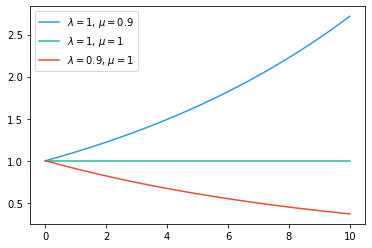

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

f_r, f_b, f_g, f_a = '#e74c3c', '#3498db', '#1abc9c', '#34495e'

t0, t1 = 0, 10

time = np.linspace(t0,t1,200, endpoint=True)

x0, rate_birth, rate_death = 1, 1, 0.9
legend1 = r'$\lambda=$'+str(rate_birth)+r', $\mu=$'+str(rate_death)
plt.plot(time, population(time), color=f_b)
x0, rate_birth, rate_death = 1, 1, 1
legend2 = r'$\lambda=$'+str(rate_birth)+r', $\mu=$'+str(rate_death)
plt.plot(time, population(time), color=f_g)
x0, rate_birth, rate_death = 1, 0.9, 1
legend3 = r'$\lambda=$'+str(rate_birth)+r', $\mu=$'+str(rate_death)
plt.plot(time, population(time), color=f_r)
plt.legend((legend1, legend2, legend3), loc='upper left')
plt.show()

## 2. Logistic
$$
  \dot x(t) = r\,x(t)\,\left(1-\frac{x(t)}{K}\right)\,,\ x(0)=x_0
$$
solution:
$$
  x(t) =  K \,\frac{1}{1+\left(\frac {K}{x_{0}} - 1\right) \,e^{-r\,t}}\,.
$$


In [5]:
population = lambda t: K*1/(1+ (K/x0-1) * np.exp(-r*t))

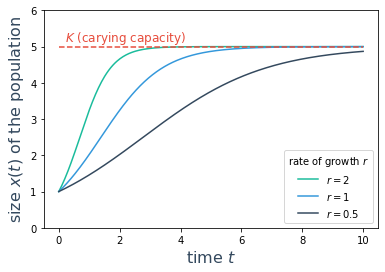

In [6]:
t0, t1 = 0, 10

time = np.linspace(t0,t1,300, endpoint=True)

x0, K = 1, 5

r = 2
legend1 = r'$r=$'+str(r)
plt.plot(time, population(time), color=f_g)
r = 1
legend2 = r'$r=$'+str(r)
plt.plot(time, population(time), color=f_b)

r = 0.5
legend3 = r'$r=$'+str(r)
plt.plot(time, population(time), color=f_a)

plt.ylim([0,K*1.2])
plt.legend((legend1, legend2, legend3), loc='lower right',title=r'rate of growth $r$')
plt.plot([t0, t1], [K, K], color=f_r, linestyle='--')
plt.text((t1-t0)/50, K, r"$K$ (carying capacity)", size=12, 
         verticalalignment='bottom', horizontalalignment='left', color=f_r)
plt.xlabel(r'time $t$', fontsize=16, color=f_a)
plt.ylabel(r'size $x(t)$ of the population', fontsize=16, color=f_a)

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('1_edo_logistique.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
    d = pdf.infodict()
    d['Title'] = '1_python_2_edo_logistic'
    plt.show()

## 3. Lotka-Volterra

\begin{align*}
{A -> 2A}     && \textrm{prey birth}  \\
{A + B -> B + \gamma B} && \textrm{predation}\\
{B -> }\emptyset && \textrm{predator death}
\end{align*}
matrice de Petersen:

|     reaction                |order | A  | B  |     reaction rate               |
| --------------------------- | ---- | -- | -- | -------------------------------- |
| prey birth                  |  1   | +1 | 0  | $k_1 [A]$                    |
| predation                   |  2   | -1 | $\gamma$ | $k_2 [A][B]$          |
| predator death              |  1   | 0  | -1 | $k_3 [{B}]$                  |


\begin{align*}
\frac{{\rm d} [A]}{{\rm d}t}&=  k_1[A] - k_2[A][B]
\\
\frac{{\rm d} [B]}{{\rm d}t}&=  \gamma\,k_2[A][B]-k_3[B]
\end{align*}

The [Lotka-Volterra model](https://en.wikipedia.org/wiki/Lotka–Volterra_equations) represents two interacting populations:

- prey, of size $ x_1 (t) $, having access to an unrestricted resource (not modeled)
- and predators, of size $ x_2 (t) $, feeding on prey.

Suppose:

- in the absence of predators, the prey population grows exponentially at a rate of $ r_1 $;
- in the absence of prey, the predator population decreases exponentially at a rate $ r_2 $.

We assume that $ r_1 $ depends on $ x_2 (t) $ and that $ r_2 $ depends on $ x_1 (t) $:

- $ r_1 = ab \, x_2 (t) $, where $ a $ is the prey birth rate in the absence of predators and $ b \, x_2 (t) $ is the predation rate assumed linear in $ x_2 (t) $;

- $ r_2 = c \, x_1 (t) -d $, where $ d $ is the death rate of predators in the absence of prey and $ c \, x_1 (t) $ is the birth rate of predators that we assume linear in $ x_1 (t) $.

We thus obtain a system of two coupled differential equations:

\begin{align*}
\dot x_1(t) &= [a-b\,x_2(t)]\,x_1(t) \\
\dot x_2(t) &= [c\,x_1(t)-d]\,x_2(t)
\end{align*}

this system does not admit an explicit solution, one must use to a numerical method.

The solution is periodic of period $ \sqrt {a \, c} $.

See for example in the [SciPy Cookbook] (http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html).

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

ODE integration

In [13]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(x, t):
    x1, x2 = x
    return [a * x1 - b * x1 * x2, 
            c * x1 * x2 - d * x2]

x0 = [600, 400]
t = np.linspace(0, 50, 250)
x_t = odeint(f, x0, t)

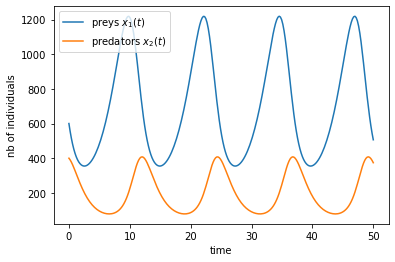

In [31]:
%matplotlib inline

plt.plot(t, x_t[:,0], label=r"preys $x_1(t)$")
plt.plot(t, x_t[:,1], label=r"predators $x_2(t)$")
plt.xlabel("time")
plt.ylabel("nb of individuals")
plt.legend()
plt.show()

### Phase space

Instead of plotting $ t \to x_1 (t) $ and $ t \to x_2 (t) $, we draw the points $ (x_1 (t), x_2 (t)) $ when $ t $ varies, so the time no longer appears, it is a curve in the [phase space](https://en.wikipedia.org/wiki/Phase_space).

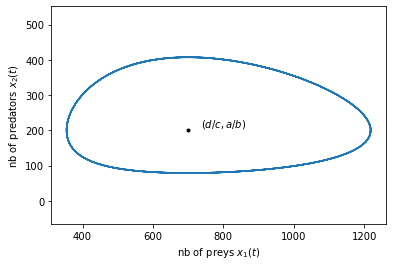

In [30]:
plt.plot(x_t[:,0], x_t[:,1])
plt.xlabel(r"nb of preys $x_1(t)$")
plt.ylabel(r"nb of predators $x_2(t)$")
marker_style = dict(linestyle=':', markersize=10)
equilibre = [d/c,a/b]
plt.plot(equilibre[0], equilibre[1], marker='.', color="k")
plt.text(1.05*equilibre[0], 1.05*equilibre[1], r'$(d/c,a/b)$')
plt.xlim(300, 1300)
plt.ylim(0, 500)
plt.axis('equal')  # scales in x and y are =
plt.show()

### Vector field

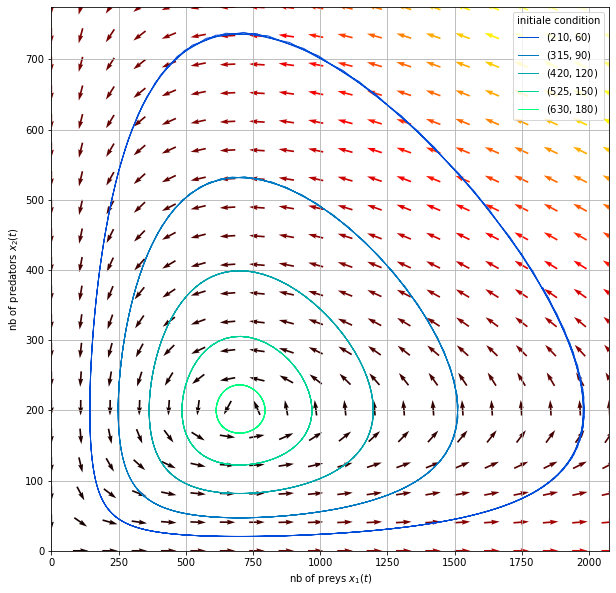

In [27]:
echelle  = np.linspace(0.3, 0.9, 5)
couleurs = plt.cm.winter(np.linspace(0.3, 1., len(echelle)))


plt.figure(figsize=(10,10))

for v, col in zip(echelle, couleurs):
    val_ini = np.multiply(v,equilibre)
    X = odeint( f, val_ini, t)
    plt.plot( X[:,0], X[:,1], lw=1, color=col, 
             label=r'$(%.f, %.f)$' % tuple(val_ini) )

x1max = plt.xlim(xmin=0)[1]
x2max = plt.ylim(ymin=0)[1]

nb_points = 20

x1 = np.linspace(0, x1max, nb_points)
x2 = np.linspace(0, x2max, nb_points)
X1 , X2  = np.meshgrid(x1, x2)
DX1, DX2 = f([X1, X2],0)
vecteurs = np.hypot(DX1, DX2)     # norm of the growth rate
vecteurs[ vecteurs == 0] = 1.     # avoid division by  0
DX1 /= vecteurs                   # normalisation of the vector field
DX2 /= vecteurs


plt.quiver(X1, X2, DX1, DX2, vecteurs, pivot='mid', cmap=plt.cm.hot)
plt.xlabel(r"nb of preys $x_1(t)$")
plt.ylabel(r"nb of predators $x_2(t)$")
plt.legend(title="initiale condition")
plt.grid()
plt.xlim(0, x1max)
plt.ylim(0, x2max)
plt.show()

# Misc

[Solve Differential Equations with ODEINT](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) from [Process Dynamics and Control in Python](https://apmonitor.com/pdc/index.php/Main/HomePage) by John D. Hedengren.

$$
     5\,\frac{d y(t)}{dt} = - y(t)+1\,, \quad y(0)=1\,,\quad 0\leq t\leq 40
$$
$u$ steps from 0 to 2 at $t=10$

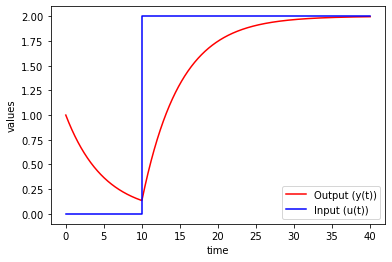

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

$$
\begin{align*}
   2\,\frac{d x(t)}{dt} &= - x(t)+u(t)\,, & x(0)=0
   \\
   5\,\frac{d y(t)}{dt} &= - y(t)+x(t)\,, & y(0)=0
   \\
   u(t) &= 2\,S(t-5)
\end{align*}
$$
for $0\leq t\leq 40$, where $S(t)$ is a step function that changes from zero to one at $t=5$. When it is multiplied by two, it changes from zero to two at that same time,  $t=5$.

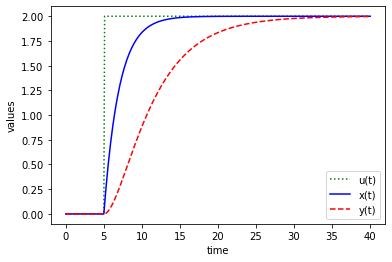

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()